In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,25)})

import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import cufflinks as sf

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/googleplaystore.csv')

In [3]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
df.drop_duplicates(subset='App', inplace=True)
df = df[df['Android Ver'] != np.nan]
df = df[df['Android Ver'] != 'NaN']
df = df[df['Installs'] != 'Free']
df = df[df['Installs'] != 'Paid']

print(len(df))

9659


In [5]:
df.sample(7)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10366,FG Radio - Radios de France,FAMILY,NaN,0,6.5M,10+,Free,0,Everyone,Entertainment,"June 10, 2018",1.0,4.2 and up
10297,Story Time FD,FAMILY,5.0,2,4.2M,10+,Free,0,Everyone 10+,Simulation,"March 25, 2016",1.1,1.6 and up
5744,Watch AW-7,TOOLS,4.2,249,3.0M,"50,000+",Free,0,Everyone,Tools,"March 17, 2018",2.0,4.3 and up
2840,"Pretty Makeup, Beauty Photo Editor & Snappy Ca...",PHOTOGRAPHY,4.5,26361,29M,"5,000,000+",Free,0,Everyone,Photography,"July 25, 2018",5.3,4.1 and up
438,Should I Answer?,COMMUNICATION,4.8,237468,8.8M,"1,000,000+",Free,0,Everyone,Communication,"July 26, 2018",2018.1.715,4.0 and up
2078,Dr. Panda Town: Vacation,FAMILY,3.8,10366,78M,"1,000,000+",Free,0,Everyone,Education;Pretend Play,"July 24, 2018",1.2.1,4.1 and up
321,【Ranobbe complete free】 Novelba - Free app tha...,COMICS,NaN,1330,22M,"50,000+",Free,0,Everyone,Comics,"July 3, 2018",6.1.1,4.2 and up


In [6]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: int(x))

In [7]:
df['Size'] = df['Size'].fillna(0)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

df['Size'] = df['Size'].apply(lambda x: float(x))
df['Installs'] = df['Installs'].apply(lambda x: float(x))

df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))

df['Reviews'] = df['Reviews'].apply(lambda x: int(x))

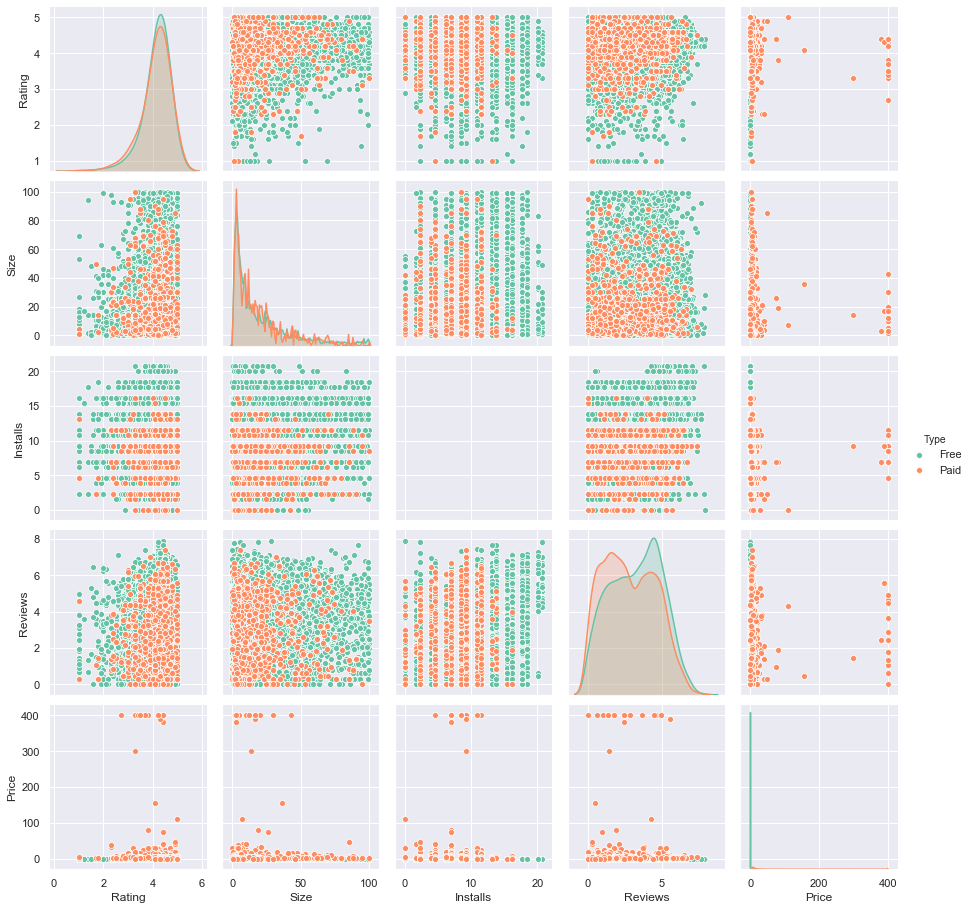

In [8]:
x = df['Rating'].dropna()
y = df['Size'].dropna()
z = df['Installs'].dropna()
p = df['Reviews'][df['Reviews'] != 0].dropna()
t = df['Type'].dropna()
price = df['Price']

sns.pairplot(pd.DataFrame(list(zip(x, y, np.log(z), np.log10(p), t, price)), 
                          columns=['Rating', 'Size', 'Installs', 'Reviews', 'Type', 'Price']), 
             hue='Type', 
             palette='Set2', 
             diag_kws={'bw': 0.3})